In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Figure 5

In [2]:
def plot_performance_comparison(df, data_name):    
    plt.style.use('default')
    
    # Increase font sizes globally
    plt.rcParams.update({
        'font.size': 14,          # Base font size
        'axes.labelsize': 16,     # Axis labels
        'axes.titlesize': 16,     # Axis title
        'xtick.labelsize': 16,    # X-axis tick labels
        'ytick.labelsize': 14,    # Y-axis tick labels
        'legend.fontsize': 14,    # Legend text
        'legend.title_fontsize': 14  # Legend title
    })
    
    
    
    plt.figure(figsize=(6, 5))    
   
    tools = {
        'Oliva$^{GR}$': ('oliva_greedy_time', 'oliva_greedy_status'),
        'Oliva$^{SA}$': ('oliva_balance_time', 'oliva_balance_status')
    }    
    
    colors = ['#084b8a', '#ff7f0e']
    markers = ['o', 'x']      
   
    for (tool_name, (time_col, status_col)), color, marker in zip(tools.items(), colors, markers):
        # Filter out UNKNOWN status cases for each method
        valid_cases = df[status_col] != "Status.UNKNOWN"
        filtered_df = df[valid_cases]
       
        ratio = filtered_df['bab_baseline_time'] / filtered_df[time_col]
        mask = ratio <= 150
       
        filtered_baseline = filtered_df['bab_baseline_time'][mask]
        filtered_ratio = ratio[mask]
       
        plt.scatter(filtered_baseline, filtered_ratio,
                   alpha=0.6,
                   c=color,
                   marker=marker,
                   s=40,
                   label=tool_name)
   
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.8, label='Ratio=1')
   
    plt.xlabel('Time(s)', fontsize=14)
    plt.ylabel('Speed-up Ratio (BaB-baseline/Oliva)', fontsize=14)
   
    plt.grid(True, alpha=0.3)
   
    # Set legend to upper left corner with larger font
    plt.legend(frameon=True, bbox_to_anchor=(0.87, 0.83),title="Method", loc='center right')
   
    plt.xlim(left=0)
   
    # Set fixed y-axis limits based on data_name
    if 'mnist' in data_name:
        plt.ylim(bottom=0, top=26)
    elif 'oval' in data_name:
        plt.ylim(bottom=0, top=80)
    else:
        plt.ylim(bottom=0)
   
    plt.tight_layout()
   
    # Save plot as PDF with data_name
    plt.savefig(f'{data_name}.pdf')
   
    return plt.gcf()

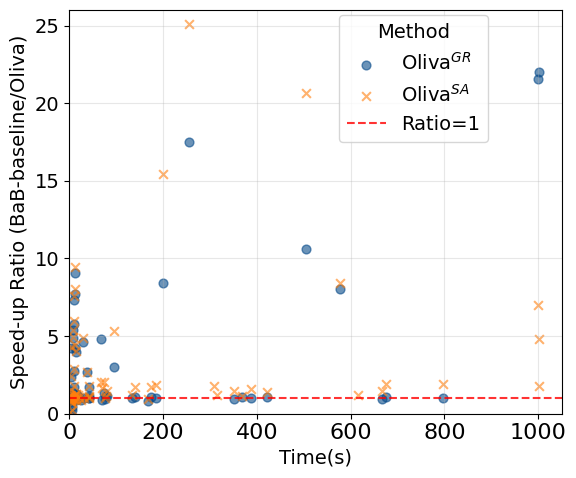

In [3]:
all_data1 = pd.read_csv('all_results/all_mnistL2.csv')
fig = plot_performance_comparison(all_data1, "f4_mnistl2")
plt.show()

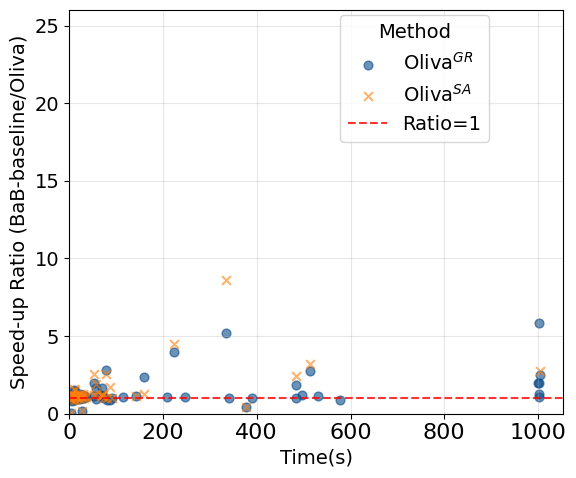

In [4]:
all_data1 = pd.read_csv('all_results/all_mnistL4.csv')
fig = plot_performance_comparison(all_data1, "f4_mnistl4")
plt.show()

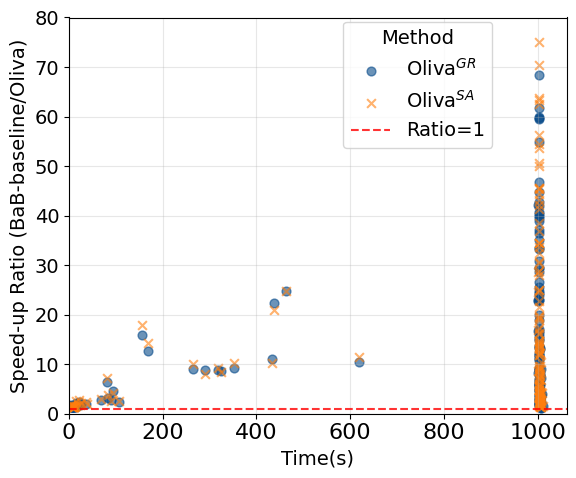

In [5]:
all_data1 = pd.read_csv('all_results/all_oval21_base.csv')
fig = plot_performance_comparison(all_data1, "f4_ovalbase")
plt.show()

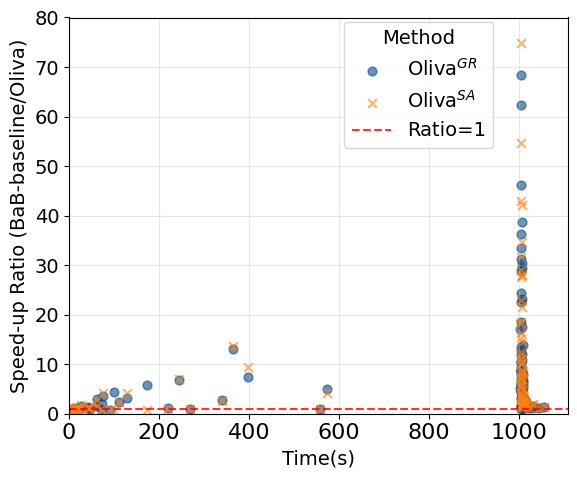

In [6]:
all_data1 = pd.read_csv('all_results/all_oval21_wide.csv')
fig = plot_performance_comparison(all_data1,"f4_ovalwide")
plt.show()

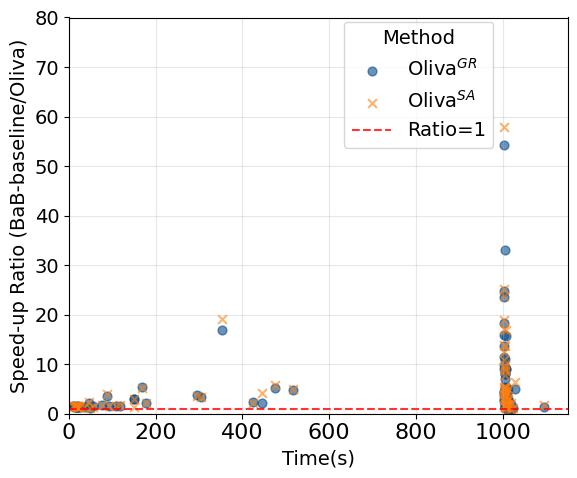

In [7]:
all_data1 = pd.read_csv('all_results/all_oval21_deep.csv')
fig = plot_performance_comparison(all_data1, "f4_ovaldeep")
plt.show()